In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
# SKLearn Stuff
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB

Load pylab for plotting

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("../../data/blood_transfusion/transfusion.data")

In [4]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
X = df.values[:,:4]
Y = df.values[:,-1]

In [6]:
# Cross validation setup
num_repetition = 100
train_range = range(10,201,10)
test_res = np.zeros((len(train_range),num_repetition))
train_res = np.zeros((len(train_range),num_repetition))


row_count = 0
for train_size in train_range:
    col_count = 0
    for rep in range(num_repetition):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=len(X)-train_size, 
                                                                             random_state=np.random.randint(1000000))
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        # Compuer classification accuracy of test set
        test_score = clf.score(X, Y)
        train_score = clf.score(X_train, y_train)
        test_res[row_count,col_count] = test_score
        train_res[row_count,col_count] = train_score
        col_count+=1
    row_count+=1

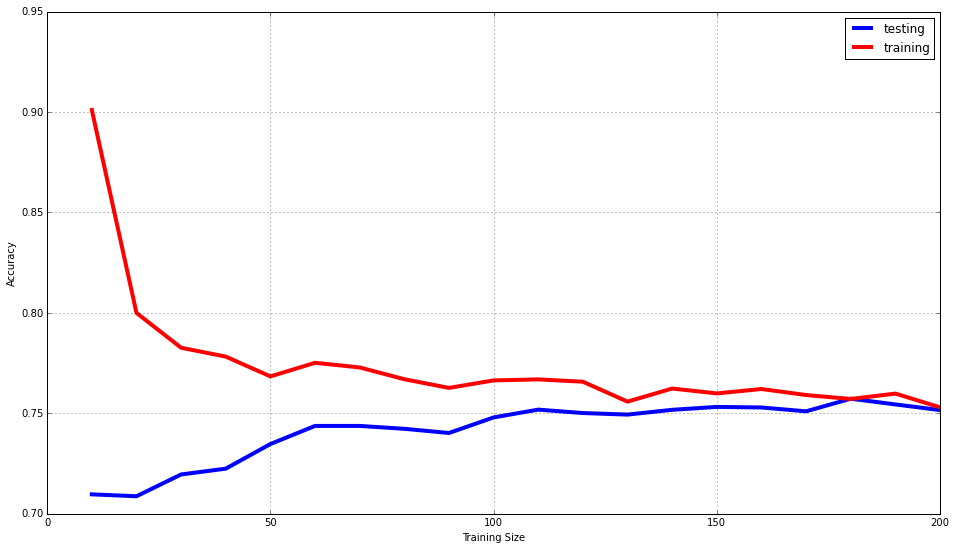

In [8]:
figsize(16,9)
y_res = np.mean(test_res,axis=1)

pyplot.plot(train_range,y_res, label='testing',linewidth=4)

y_res = np.mean(train_res,axis=1)
pyplot.plot(train_range,y_res,color='r', label='training',linewidth=4)
pyplot.grid()
pyplot.legend()
pyplot.xlabel('Training Size')
pyplot.ylabel('Accuracy')

In [9]:
def cross_validate_advanced(X,Y,clf, num_repetition = 100,train_range = range(40,201,10)):  
    test_res = np.zeros((len(train_range),num_repetition))
    train_res = np.zeros((len(train_range),num_repetition))
    row_count = 0
    for train_size in train_range:
        print "Starting %s samples" % train_size
        col_count = 0
        for rep in range(num_repetition):
            X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=len(X)-train_size, 
                                                                                 random_state=np.random.randint(1000000))
#             clf = model_function()
            clf.fit(X_train, y_train)
            # Compuer classification accuracy of test set
            test_score = clf.score(X, Y)
            train_score = clf.score(X_train, y_train)
            test_res[row_count,col_count] = test_score
            train_res[row_count,col_count] = train_score
            col_count+=1
        row_count+=1
    return test_res,train_res

In [10]:
test_res_nb, train_res_nb = cross_validate_advanced(X,Y,GaussianNB())

Starting 40 samples
Starting 50 samples
Starting 60 samples
Starting 70 samples
Starting 80 samples
Starting 90 samples
Starting 100 samples
Starting 110 samples
Starting 120 samples
Starting 130 samples
Starting 140 samples
Starting 150 samples
Starting 160 samples
Starting 170 samples
Starting 180 samples
Starting 190 samples
Starting 200 samples


In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
test_res_log, train_res_log = cross_validate_advanced(X,Y,SGDClassifier(loss="hinge", penalty="l2"))

Starting 40 samples
Starting 50 samples
Starting 60 samples
Starting 70 samples
Starting 80 samples
Starting 90 samples
Starting 100 samples
Starting 110 samples
Starting 120 samples
Starting 130 samples
Starting 140 samples
Starting 150 samples
Starting 160 samples
Starting 170 samples
Starting 180 samples
Starting 190 samples
Starting 200 samples


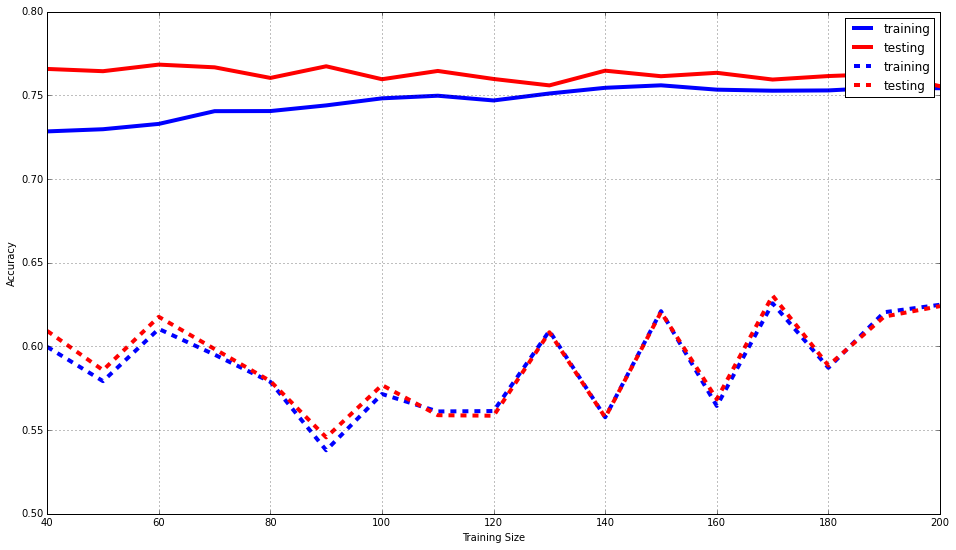

In [13]:
figsize(16,9)
train_range = range(40,201,10)
y_res = np.mean(test_res_nb,axis=1)
pyplot.plot(train_range,y_res, label='training',linewidth=4)
y_res = np.mean(train_res_nb,axis=1)
pyplot.plot(train_range,y_res,color='r', label='testing',linewidth=4)

y_res = np.mean(test_res_log,axis=1)
pyplot.plot(train_range,y_res, label='training',color ='b',linewidth=4, linestyle ='--')
y_res = np.mean(train_res_log, axis=1)
pyplot.plot(train_range,y_res,color='r', label='testing',linewidth=4,linestyle ='--')
pyplot.grid()
pyplot.legend()
pyplot.xlabel('Training Size')
pyplot.ylabel('Accuracy')